<a href="https://colab.research.google.com/github/Prash7621/Data-Science/blob/main/D26decisiontree(ii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overfitted Model Accuracy(Deep Tree):
  -Train Accuracy:1.00
   -Test Accuracy: 1.00

Pruned Model Accuracy(Max Depth =3):
  -Train Accuracy:1.00
  -test Accuracy :1.00



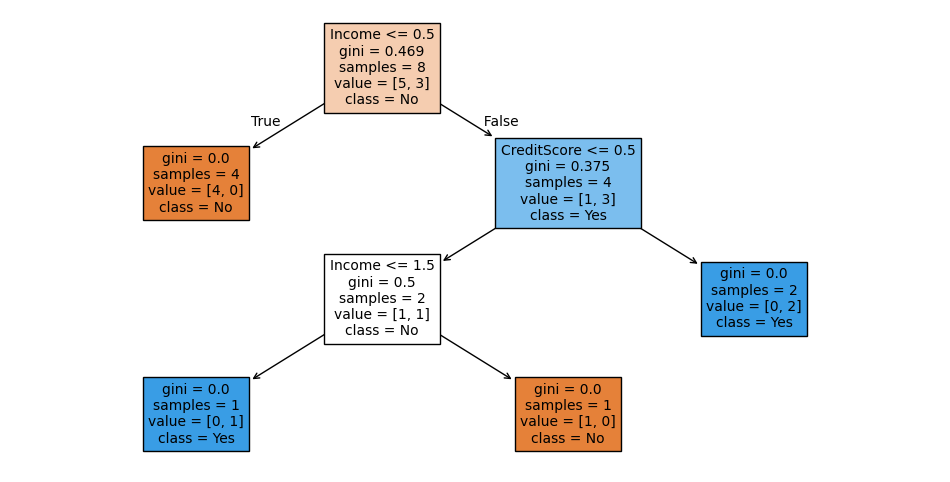

Loan Approved? Yes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

data = {
    'Age': [25, 45, 35, 50, 30, 40, 60, 20, 55, 28],
    'Income': ['Low', 'High', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'Low'],
    'CreditScore': ['Fair', 'Good', 'Good', 'Fair', 'Good', 'Fair', 'Good', 'Fair', 'Good', 'Fair'],
    'LoanApproved': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No']
}

df=pd.DataFrame(data)

df['Income'] = df['Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['CreditScore'] = df['CreditScore'].map({'Fair': 0, 'Good': 1})
df['LoanApproved'] = df['LoanApproved'].map({'No': 0, 'Yes': 1})


X=df[['Age','Income','CreditScore']]
y=df['LoanApproved']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


deep_tree=DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=42)
deep_tree.fit(X_train,y_train)

pruned_tree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
pruned_tree.fit(X_train,y_train)

y_train_pred_deep=deep_tree.predict(X_train)
y_test_pred_deep=deep_tree.predict(X_test)

y_train_pred_pruned=pruned_tree.predict(X_train)
y_test_pred_pruned=pruned_tree.predict(X_test)


train_acc_deep=accuracy_score(y_train,y_train_pred_deep)
test_acc_deep=accuracy_score(y_test,y_test_pred_deep)

train_acc_pruned=accuracy_score(y_train,y_train_pred_pruned)
test_acc_pruned=accuracy_score(y_test,y_test_pred_pruned)


print("Overfitted Model Accuracy(Deep Tree):")
print(f"  -Train Accuracy:{train_acc_deep:.2f}")
print(f"   -Test Accuracy: {test_acc_deep:.2f}\n")


print("Pruned Model Accuracy(Max Depth =3):")
print(f"  -Train Accuracy:{train_acc_pruned:.2f}")
print(f"  -test Accuracy :{train_acc_pruned:.2f}\n")


plt.figure(figsize=(12,6))
plot_tree(pruned_tree,feature_names=['Age','Income','CreditScore'],class_names=['No','Yes'],filled=True,fontsize=10)
plt.show()

new_applicant = [[40, 1, 1]]
prediction = pruned_tree.predict(new_applicant)
print("Loan Approved?", "Yes" if prediction[0]==1 else "No")